# Linear Regression Model

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [14]:
df['Salary'].isna().sum()

np.int64(0)

In [15]:
df['YearsExperience'].isna().sum()

np.int64(0)

In [22]:
from sklearn.preprocessing import add_dummy_feature
from matplotlib import pyplot as plt

<strong>Visualizing the years of experience</strong>

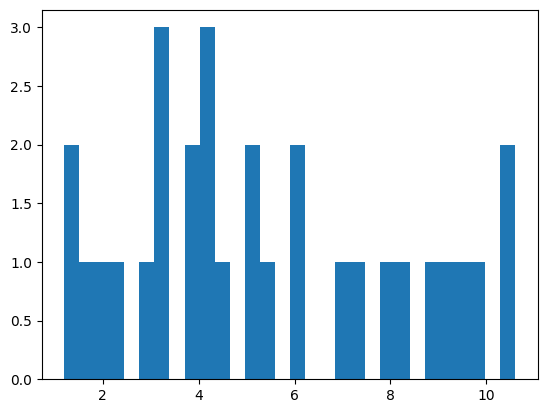

In [26]:
plt.hist(df['YearsExperience'], bins=30)
plt.show()

In [30]:
exp_category = pd.cut(df['YearsExperience'], bins=[0., 2.0, 4.0, 6.0, 8.0, 10.0, np.inf])
exp_category_sorted = exp_category.value_counts().sort_values()
print(exp_category_sorted)

YearsExperience
(10.0, inf]    2
(0.0, 2.0]     3
(6.0, 8.0]     4
(8.0, 10.0]    5
(2.0, 4.0]     8
(4.0, 6.0]     8
Name: count, dtype: int64


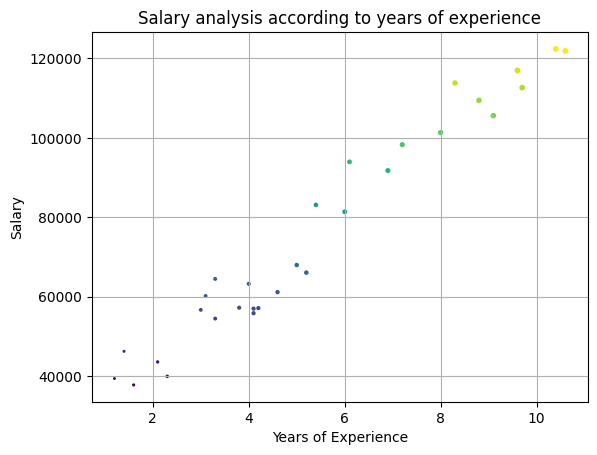

In [97]:
plt.scatter(df['YearsExperience'], df['Salary'],c=df['Salary'], s=df['YearsExperience'], alpha=1.0)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(visible=True)
plt.title("Salary analysis according to years of experience")
plt.show()

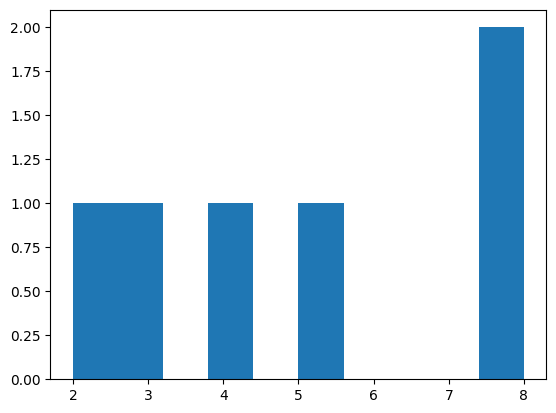

In [34]:
plt.hist(exp_category_sorted)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

In [44]:
train_set, test_set = train_test_split(df, test_size=0.4, stratify=exp_category)

In [45]:
print(train_set, test_set)  # since data is limited, used train_test ratio as 60:40

    Unnamed: 0  YearsExperience    Salary
27          27              9.7  112636.0
7            7              3.3   54446.0
19          19              6.1   93941.0
25          25              9.1  105583.0
26          26              9.6  116970.0
16          16              5.2   66030.0
4            4              2.3   39892.0
12          12              4.1   56958.0
2            2              1.6   37732.0
28          28             10.4  122392.0
20          20              6.9   91739.0
0            0              1.2   39344.0
13          13              4.2   57082.0
8            8              3.3   64446.0
10          10              4.0   63219.0
11          11              4.1   55795.0
6            6              3.1   60151.0
14          14              4.6   61112.0     Unnamed: 0  YearsExperience    Salary
9            9              3.8   57190.0
1            1              1.4   46206.0
22          22              8.0  101303.0
15          15              5.0   

In [115]:
train_set_copy = train_set.copy()
# print(train_set_copy)
count_years_of_exp_trainingSet = train_set_copy['YearsExperience'].count()

In [116]:
salary = np.array(train_set_copy['Salary'])

In [118]:
years_of_exp = np.array(train_set_copy['YearsExperience']).reshape(count_years_of_exp_trainingSet,1)  # preparing the column vector
years_of_exp_matrix = add_dummy_feature(years_of_exp)
theta_best = np.linalg.inv(years_of_exp_matrix.T @ years_of_exp_matrix) @ years_of_exp_matrix.T @ salary

print(theta_best)

[23743.30320426  9397.505844  ]


In [125]:
count_years_of_exp_testingSet = test_set['YearsExperience'].count()
years_of_exp_testingSet = np.array(test_set['YearsExperience']).reshape(count_years_of_exp_testingSet,1)  # preparing the column vector for testing set
test_set_matrix = add_dummy_feature(years_of_exp_testingSet)

In [127]:
y_predicted = test_set_matrix @ theta_best
y_predicted

array([ 59453.82541147,  36899.81138586,  98923.34995627,  70730.83242427,
        74489.83476187, 106441.35463147,  51935.82073626,  80128.33826827,
       101742.60170947, 123356.86515067,  43478.06547666,  91405.34528107])

Visualizing the result reference to test set

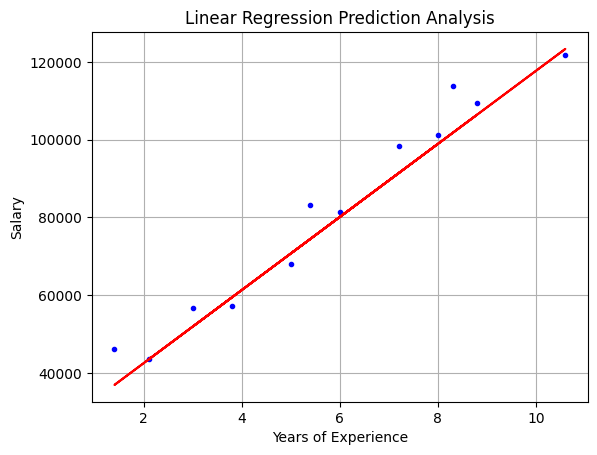

In [136]:
plt.plot(test_set['YearsExperience'], test_set['Salary'], "b.")
plt.plot(years_of_exp_testingSet, y_predicted, "r-")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Prediction Analysis")
plt.grid(visible=True)
plt.show()

# Comparision with sklearn's LinearRegression

In [139]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set[['YearsExperience']], train_set[['Salary']])
print(lin_reg.intercept_, lin_reg.coef_)

[23743.30320426] [[9397.505844]]


In [143]:
lin_reg_predictions = lin_reg.predict(test_set[['YearsExperience']])

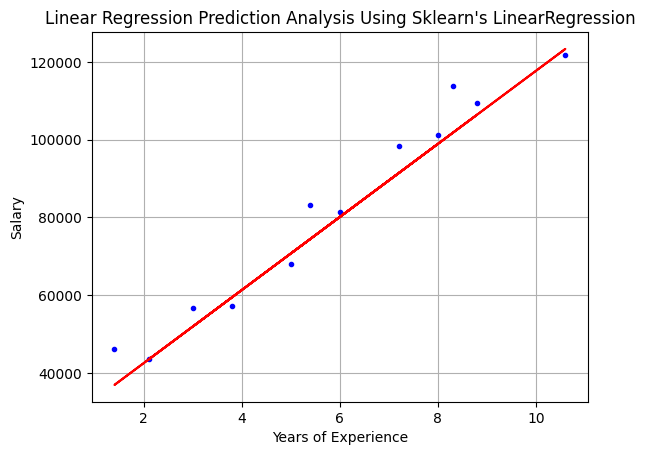

In [144]:
plt.plot(test_set['YearsExperience'], test_set['Salary'], "b.")
plt.plot(years_of_exp_testingSet, lin_reg_predictions, "r-")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Prediction Analysis Using Sklearn's LinearRegression")
plt.grid(visible=True)
plt.show()